In [1]:
import sys
import copy
sys.path.insert(0, "../../../")
from classes.calculators.lennardjones import LennardJones
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.atom_classes.atom_file_handler import Atom_File_handler
from classes.optimizers.md_simulator1 import MDT_simulator
from classes.optimizers.random_struct_search import Line_searcher1
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
class MD_animator(Animator):
    def __init__(self, 
                 e_line,
                 default_cols=("C0", "C1"), markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)
        self.e_line = e_line

    def animate(self, i, atom_col, position, energies):
        cm_pos = np.mean(position,axis=0)
        #print("hov")
        atom_col.set_atom_positions(position-cm_pos)
        plot_elems = self(atom_col)
        xs = np.linspace(0, i, i)
        self.e_line.set_data(xs, energies[:i])
        return plot_elems["atoms"] + [self.e_line]

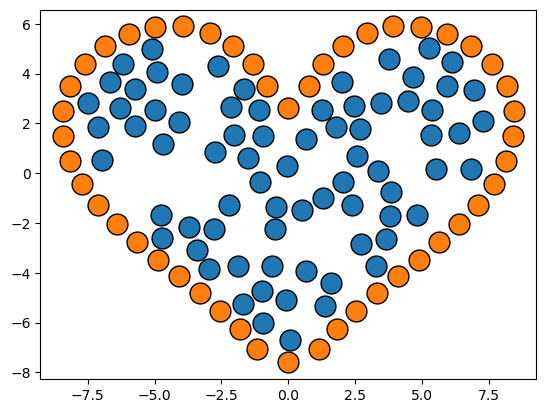

In [5]:
fig, ax = plt.subplots()

atom_writer = Atom_File_handler()
init_col = atom_writer.load_atom_collections("../saved_atom_cols/T8.0sim")[-1]

animator = MD_animator(markersize=15, e_line=None)

init_col.reset_plot_axes()
s = animator(atom_col=init_col, ax=ax)

In [16]:
temps = np.arange(0.25,8.25,0.25)[::-1] #[8.0,7.5,7.0,6.5,6.0,5.5,5.0,4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0,0.5,0.05]
atomcol_for_cool_down = init_col
md_simulator = MDT_simulator(atom_col=atomcol_for_cool_down, temp=0.05)
for temp in temps:
    md_simulator.temp=temp
    md_simulator.run_MDsimulation(N_steps=500)
    atom_writer.save_atom_collections(md_simulator.logged_atom_cols, filename=f"saved_atom_cols/T{round(temp,2)}sim")
    atomcol_for_cool_down = md_simulator.logged_atom_cols[-1]
    md_simulator = MDT_simulator(atom_col=atomcol_for_cool_down, temp=temp)